## Online LinUCB Contextual Bandits for News Article Recommendation

In [72]:
import pandas as pd
import numpy as np
from sklearn.linear_model import SGDRegressor
import matplotlib.pyplot as plt

In [23]:
names= ['action','reward']
names_c = []
for i in range(10):
    for j in range(10):
        names_c.append('context'+str(i)+str(j))
names.extend(names_c)
data = pd.read_csv("dataset.txt",sep=" ",names=names,index_col=False)

In [109]:
data.shape

(10000, 102)

#### DATA  
10000 rows of data with chosen arm (random) out of 10 actions(articles) and reward (article clicked or not) , with 10-dimensional context vectors of each arm.

In [110]:
data.head()

,action,reward,context00,context01,context02,context03,context04,context05,context06,context07,...,context90,context91,context92,context93,context94,context95,context96,context97,context98,context99
0,2,0,5,0,0,37,6,0,0,0,...,0,0,1,3,0,0,17,30,4,0
1,8,0,1,3,36,0,0,0,0,0,...,0,0,3,0,1,5,1,0,0,10
2,5,0,3,0,0,0,0,0,0,0,...,0,0,0,0,23,0,11,3,0,0
3,4,0,77,0,0,13,0,0,0,0,...,0,5,0,0,0,2,4,0,0,0
4,2,1,43,0,2,44,1,0,0,0,...,0,0,0,0,0,0,0,13,0,0


In [164]:
def LinUCB(n_arms,context_dim,alpha,data,rounds,train_flag):
    A = np.eye(context_dim)
    A = np.vstack([A]*n_arms).reshape(context_dim,context_dim,n_arms)
    #A = np.zeros([n_arms,context_dim,context_dim])
    b = np.zeros([n_arms,context_dim,1])
    #print(A.shape,b.shape)
    cum_reward = 0
    reward_history = np.zeros(rounds)
    cum_reward_history = np.zeros(rounds)
    n_update = 0
    for i in range(data.shape[0]):
        
        #print(i)
        qa = []
        for j in range(n_arms):
            context_a = np.array(data.loc[i,'context'+str(j)+'0':'context'+str(j)+'9']).reshape(context_dim,1)
            A_inv = np.linalg.inv(A[j])
            theta_a = np.matmul(A_inv,b[j])
            p_ta = np.dot(theta_a.T,context_a) + alpha*np.sqrt(np.matmul(np.matmul(context_a.T,A_inv),context_a))
            qa.append(p_ta[0][0])
            #print(qa)
        #print(qa)
        action = np.random.choice(np.where(qa==max(qa))[0])
        #print(action)
        context_a_selected = np.array(data.loc[i,'context'+str(action)+'0':'context'+str(action)+'9']).reshape(context_dim,1)
        data_action = data.loc[i,'action'] - 1
        if data_action == action:
            n_update+=1
            r = data.loc[i,'reward']
            A[action] = A[action] + np.outer(context_a_selected,context_a_selected)
            b[action] = b[action] + r*context_a_selected
            reward_history[n_update]= r
            cum_reward+=r
            cum_reward_history[n_update]=cum_reward
        if n_update==rounds-1:
            break     
            
    return reward_history,cum_reward_history

In [165]:
rhistory,chistory = LinUCB(10,10,1,train_data,800,True)

In [166]:
print(np.mean(rhistory))

0.52875


### Average Cumulative reward plot

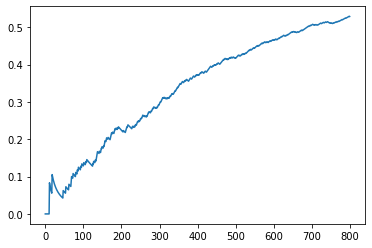

In [167]:
plt.plot(chistory[:800]/np.linspace(1,800,800))